# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x'$ =  $0$

* $x'$ =  $𝑣_𝑥$

* $v_y'$ =  $-𝑔$

* $y'$ =  $𝑣_y$


Code the equations into a function 

In [1]:
import math as mt
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
g = 9.81
def projectile_func(t, state):
    x, vx, y, vy = state
    dx_dt = vx
    dvx_dt = 0
    dy_dt = vy
    dvy_dt = -g
    dstate = [dx_dt, dvx_dt, dy_dt, dvy_dt]
    return dstate

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [3]:
initial_vel = 300
launch_ang_deg = 50  
launch_ang_rad = np.radians(launch_ang_deg)
 
state_0 = np.array([0, initial_vel * np.cos(launch_ang_rad), 0, initial_vel * np.sin(launch_ang_rad)])

def event_func(t, state):
    return state[2]

event_func.terminal = True
event_func.direction = -1

t = np.linspace(0, 50, 1000)

result = integrate.solve_ivp(projectile_func,(t[0],t[-1]), state_0, method='RK45', t_eval=t, events=event_func)

print(result)

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  5.005e-02 ...  4.680e+01  4.685e+01]
        y: [[ 0.000e+00  9.651e+00 ...  9.024e+03  9.034e+03]
            [ 1.928e+02  1.928e+02 ...  1.928e+02  1.928e+02]
            [ 0.000e+00  1.149e+01 ...  1.287e+01  1.384e+00]
            [ 2.298e+02  2.293e+02 ... -2.293e+02 -2.298e+02]]
      sol: None
 t_events: [array([ 4.685e+01])]
 y_events: [array([[ 9.035e+03,  1.928e+02,  0.000e+00, -2.298e+02]])]
     nfev: 50
     njev: 0
      nlu: 0


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

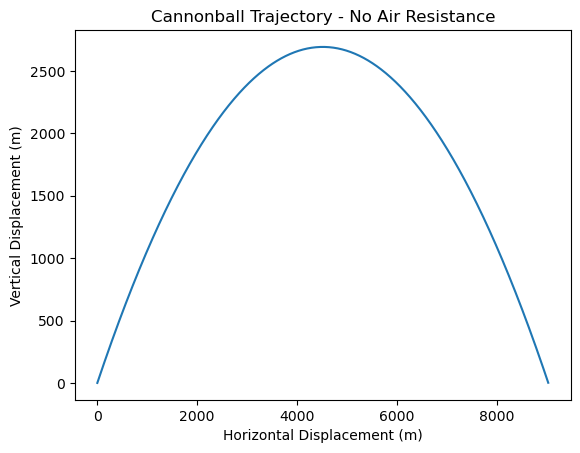

In [4]:
t_values = result.t
x_values = (result.y[0])
y_values = (result.y[2])

plt.figure("Vertical vs. Horizontal Positions")
plt.plot(x_values, y_values)
plt.title("Cannonball Trajectory - No Air Resistance")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.show()

In [5]:
ground_hit_index = np.argmax(x_values)
time_of_ground_hit = t_values[ground_hit_index]
print(f"Time to hit ground: {time_of_ground_hit} seconds")

horizontal_range = max(x_values)
print(f"Horizontal range: {horizontal_range} meters")

Time to hit ground: 46.84684684684685 seconds
Horizontal range: 9033.771811810837 meters


# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [6]:
def runge_kutta_4(func, t, y0, h):
    t0, t_final = t
    n = int((t_final - t0) / h) + 1
    t_values_rk = np.linspace(t0, t_final, n)
    y_values_rk = np.zeros((len(y0), n))
    y_values_rk[:,0] = y0
    
    for num in range(1, n):
        t = t_values_rk[num-1]
        y = y_values_rk[:, num-1]
        k1 = h * np.array(func(t, y))
        k2 = h * np.array(func(t + h/2, y + k1/2))
        k3 = h * np.array(func(t + h/2, y + k2/2))
        k4 = h * np.array(func(t + h, y + k3))
        new_y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        y_values_rk[:, num] = new_y
        
        if new_y[2] < 0:
            y_values_rk = y_values_rk[:, :num + 1]
            t_values_rk = t_values_rk[:num + 1]
            break
            
    return t_values_rk, y_values_rk

h = 0.05

t_values_rk, y_values_rk = runge_kutta_4(projectile_func, (t[0], t[-1]), state_0, h)

x_values_rk = y_values_rk[0]
y_values_rk_ = y_values_rk[2]

ground_hit_index = np.argmax(y_values_rk_ < 0)
time_of_ground_hit = t_values_rk[ground_hit_index]
print(f"Time to hit ground: {time_of_ground_hit} seconds")

horizontal_range = max(x_values_rk)
print(f"Horizontal range: {horizontal_range} meters")

Time to hit ground: 46.900000000000006 seconds
Horizontal range: 9044.021668289453 meters


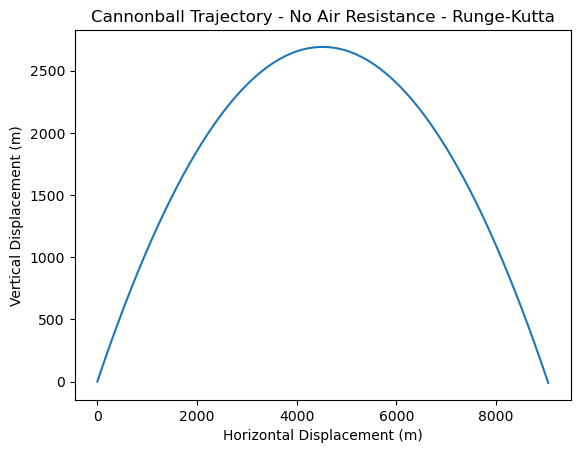

In [7]:
plt.title("Cannonball Trajectory - No Air Resistance - Runge-Kutta")
plt.plot(x_values_rk, y_values_rk_)
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.show()

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

The time approximations are very similar, and so are the horizontal range values. The Runge-Kutta order 4 function gives a slightly larger approximation for both answer. Graphing them, however, the projectile curves are very similar. It appears as though there. is only one curve because the curves are on top of each other.

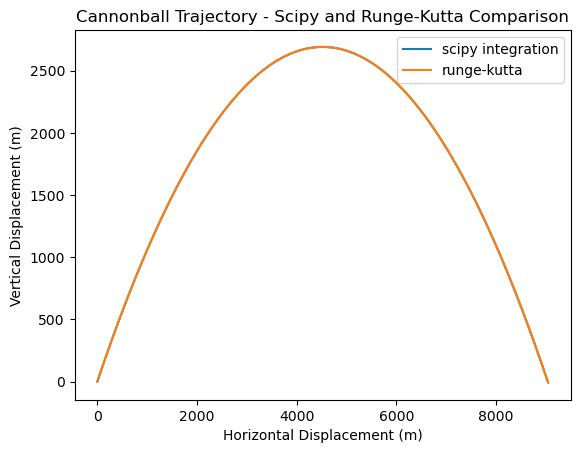

In [8]:
plt.figure("Vertical vs. Horizontal Positions")
plt.plot(x_values, y_values, label='scipy integration')
plt.plot(x_values_rk, y_values_rk_, label='runge-kutta')

plt.title("Cannonball Trajectory - Scipy and Runge-Kutta Comparison")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.show()


# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x'$ = $\frac{-c}{m}(v)(v_x)$

* $x'$ = $v_x$

* $v_y'$ = $-g - \frac{c}{m}(v)(v_y)$

* $y'$ = $v_y$

where $v$ = $\sqrt{(v_x^2 + v_y^2)}$

Code the equations into a function

In [9]:
gamma = 0.25 
D = 15e-2
rho = 7.8e3
v0 = 300
theta = np.radians(50)
g = 9.81
m = (4/3) * np.pi * (D/2)**3 * rho
c = gamma * D**2

def projectile_air_resistance(t, state):
    x, vx, y, vy = state
    v = np.sqrt(vx**2 + vy**2)
    dx_dt = vx
    dvx_dt = -c/m * v * vx
    dy_dt = vy
    dvy_dt = -g - c/m * v * vy
    return [dx_dt, dvx_dt, dy_dt, dvy_dt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [10]:
t = np.linspace(0, 35, 10000)

sol = integrate.solve_ivp(projectile_air_resistance, (t[0], t[-1]), state_0, method='RK45', t_eval=t, events=event_func)

print(sol)


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.500e-03 ...  3.118e+01  3.118e+01]
        y: [[ 0.000e+00  6.748e-01 ...  2.690e+03  2.691e+03]
            [ 1.928e+02  1.928e+02 ...  4.093e+01  4.093e+01]
            [ 0.000e+00  8.042e-01 ...  7.232e-01  3.040e-01]
            [ 2.298e+02  2.297e+02 ... -1.198e+02 -1.198e+02]]
      sol: None
 t_events: [array([ 3.118e+01])]
 y_events: [array([[ 2.691e+03,  4.092e+01,  1.137e-13, -1.198e+02]])]
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

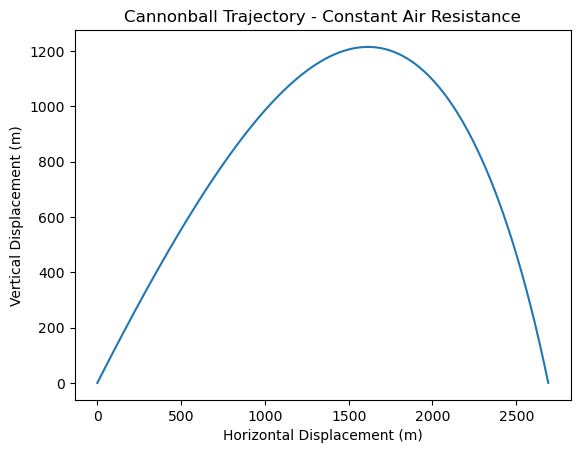

In [12]:
t_sol = sol.t
x_sol = (sol.y[0])
y_sol = (sol.y[2])

plt.figure("Vertical vs. Horizontal Positions")
plt.plot(x_sol, y_sol)
plt.title("Cannonball Trajectory - Constant Air Resistance")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.show()

In [13]:
ground_hit_index = np.argmax(x_sol)
time_of_ground_hit = t_sol[ground_hit_index]
print(f"Time to hit ground: {time_of_ground_hit} seconds")

horizontal_range = max(x_sol)
print(f"Horizontal range: {horizontal_range} meters")


Time to hit ground: 31.18111811181118 seconds
Horizontal range: 2690.6424761043604 meters


# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x'$ = $-(\frac{\gamma(D^2)exp^(-y/\lambda)}{m}(v)(v_x)$

* $x'$ = $v_x$

* $v_y'$ = $-g - (\frac{\gamma(D^2)exp^(-y/\lambda)}{m}(v)(v_y)$

* $y'$ = $v_y$

where $v$ = $\sqrt{(v_x^2 + v_y^2)}$

Code the equations into a function

In [14]:
lambd = 10000

def projectile_air_drag(t, state):
    x, vx, y, vy = state
    v = np.sqrt(vx**2 + vy**2)
    dx_dt = vx
    dvx_dt = -(gamma * D**2 * np.exp(-y / lambd))/m * v * vx
    dy_dt = vy
    dvy_dt = -g - (gamma * D**2 * np.exp(-y / lambd))/m * v * vy
    return [dx_dt, dvx_dt, dy_dt, dvy_dt]


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [15]:
t = np.linspace(0, 35, 10000)

sol_air_drag = integrate.solve_ivp(projectile_air_drag, (t[0], t[-1]), state_0, method='RK45', t_eval=t, events=event_func)

print(sol_air_drag)


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.500e-03 ...  3.155e+01  3.156e+01]
        y: [[ 0.000e+00  6.748e-01 ...  2.808e+03  2.808e+03]
            [ 1.928e+02  1.928e+02 ...  4.352e+01  4.352e+01]
            [ 0.000e+00  8.042e-01 ...  6.704e-01  2.458e-01]
            [ 2.298e+02  2.297e+02 ... -1.213e+02 -1.213e+02]]
      sol: None
 t_events: [array([ 3.156e+01])]
 y_events: [array([[ 2.808e+03,  4.351e+01, -1.137e-13, -1.213e+02]])]
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

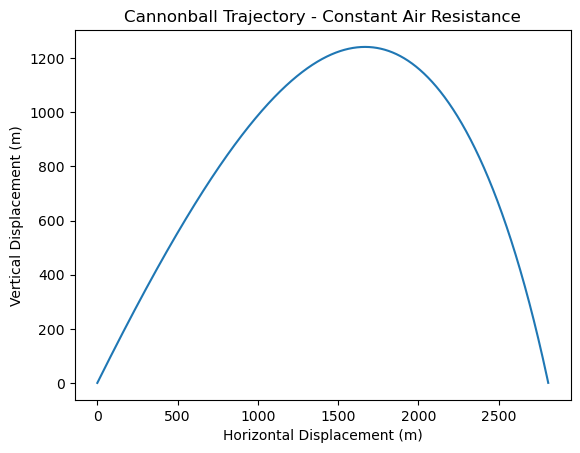

In [16]:
t_values_air_drag = sol_air_drag.t
x_values_air_drag = (sol_air_drag.y[0])
y_values_air_drag = (sol_air_drag.y[2])

plt.figure("Vertical vs. Horizontal Positions")
plt.plot(x_values_air_drag, y_values_air_drag)
plt.title("Cannonball Trajectory - Constant Air Resistance")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.show()


In [17]:
ground_hit_index = np.argmax(x_values_air_drag)
time_of_ground_hit = t_values_air_drag[ground_hit_index]
print(f"Time to hit ground: {time_of_ground_hit} seconds")

horizontal_range = max(x_values_air_drag)
print(f"Horizontal range: {horizontal_range} meters")

Time to hit ground: 31.555655565556556 seconds
Horizontal range: 2808.325977738672 meters


# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

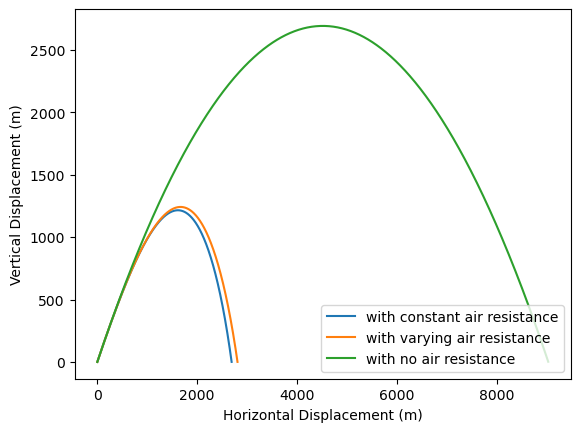

In [18]:
plt.figure("all together")
plt.plot(x_sol, y_sol, label='with constant air resistance')
plt.plot(x_values_air_drag, y_values_air_drag, label='with varying air resistance')
plt.plot(x_values, y_values, label='with no air resistance')
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.show()

Your results should look like the plot below.

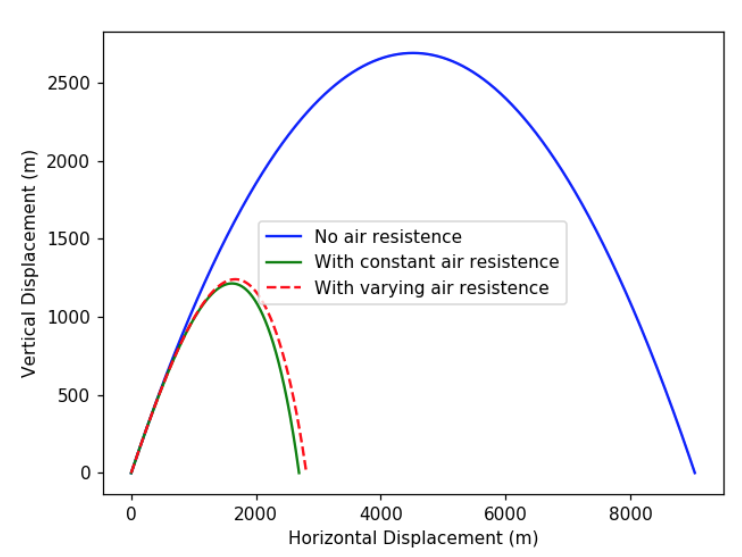

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

Turning on air resistance has a bigger impact since it introduces a constant drag force acting on the steel ball. In comparison, atmospheric variation has little effect on the projectile since the problem takes place at relatively low altitude. Variation in atmosphere would have a bigger impact if the projectile covered a greater vertical distance and therefore traveled through a greater altitude difference. 

This is supported by the graph above since the curve in green shows the path with constant air resistance, which does not reach the same y and x maximum as the curve in red, which shows variation in the atmosphere. Therefore, since there is a greater difference between the blue curve and the green curve, we know constant air resistance has a bigger effect. 